In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Preprocessing

In [ ]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [ ]:
df = pd.concat([df_train,df_test])

In [ ]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [ ]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [ ]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [ ]:
df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [ ]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [ ]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [ ]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Convert categorical values into numerical values (one hot encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['protocol_type', 'service', 'flag']
df_onehot = pd.get_dummies(df, columns = categorical_columns)

In [ ]:
df_onehot.head(10)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   
5         0          0          0     0               0       0    0   
6         0          0          0     0               0       0    0   
7         0          0          0     0               0       0    0   
8         0          0          0     0               0       0    0   
9         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                  0          0                0           0             0   
1                  0          0                0           0             0   
2                  0          0                0           0             0   
3                  0          1                0           0             0   
4                  0          1                0           0             0   
5                  0          0                0           0             0   
6                  0          0                0           0             0   
7                  0          0                0           0             0   
8                  0          0                0           0             0   
9                  0          0                0           0             0   

   num_root  num_file_creations  num_shells  num_access_files  \
0         0                   0           0                 0   
1         0                   0           0                 0   
2         0                   0           0                 0   
3         0                   0           0                 0   
4         0                   0           0                 0   
5         0                   0           0                 0   
6         0                   0           0                 0   
7         0                   0           0                 0   
8         0                   0           0                 0   
9         0                   0           0                 0   

   num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  \
0                  0              0               0      2          2   
1                  0              0               0     13          1   
2                  0              0               0    123          6   
3                  0              0               0      5          5   
4                  0              0               0     30         32   
5                  0              0               0    121         19   
6                  0              0               0    166          9   
7                  0              0               0    117         16   
8                  0              0               0    270         23   
9                  0              0               0    133          8   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   
3          0.2              0.2          0.0              0.0           1.00   
4          0.0              0.0          0.0              0.0           1.00   
5          0.0              0.0          1.0              1.0           0.16   
6          1.0              1.0          0.0              0.0           0.05   
7          1.0              1.0          0.0              0.0           0.14   
8          1.0              1.0          0.0              0.0           0.09   
9          1.0              1.0

### Scaling numericals values

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df_onehot[columns_to_scale] = min_max_scaler.fit_transform(df_onehot[columns_to_scale])

In [ ]:
df_preprocessed = df_onehot.copy()

In [ ]:
df_preprocessed.shape

(148517, 123)

In [ ]:
df_preprocessed.head(3)

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0       0.0  3.558064e-07        0.0     0               0     0.0  0.0   
1       0.0  1.057999e-07        0.0     0               0     0.0  0.0   
2       0.0  0.000000e+00        0.0     0               0     0.0  0.0   

   num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                0.0          0              0.0           0           0.0   
1                0.0          0              0.0           0           0.0   
2                0.0          0              0.0           0           0.0   

   num_root  num_file_creations  num_shells  num_access_files  \
0       0.0                 0.0         0.0               0.0   
1       0.0                 0.0         0.0               0.0   
2       0.0                 0.0         0.0               0.0   

   num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
0                  0              0               0  0.003914   0.003914   
1                  0              0               0  0.025440   0.001957   
2                  0              0               0  0.240705   0.011742   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0          0.0              0.0          0.0              0.0           1.00   
1          0.0              0.0          0.0              0.0           0.08   
2          1.0              1.0          0.0              0.0           0.05   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           0.00                 0.0        0.588235            0.098039   
1           0.15                 0.0        1.000000            0.003922   
2           0.07                 0.0        1.000000            0.101961   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   
1                         0.88                          0.0   
2                         0.00                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   
1                   0.0                       0.0                  0.00   
2                   1.0                       1.0                  0.00   

   dst_host_srv_rerror_rate    label  protocol_type_icmp  protocol_type_tcp  \
0                       0.0   normal               False               True   
1                       0.0   normal               False              False   
2                       0.0  neptune               False               True   

   protocol_type_udp  service_IRC  service_X11  service_Z39_50  service_aol  \
0              False        False        False           False        False   
1               True        False        False           False        False   
2              False        False        False           False        False   

   service_auth  service_bgp  service_courier  service_csnet_ns  service_ctf  \
0         False        False            False             False        False   
1         False        False            False             False        False   
2         False        False            False             False        False   

   service_daytime  service_discard  service_domain  service_domain_u  \
0            False            False           False             False   
1            False            False           False             False   
2            False            False           False             False   

   service_echo  service_eco_i  service_ecr_i  service_efs  service_exec  \
0         False          False          False        False         False   
1         False          False

In [ ]:
df_preprocessed_corr = df_preprocessed.copy()

In [ ]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [ ]:
df_preprocessed_corr.head(20)

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0        0.0  3.558064e-07  0.000000e+00     0               0     0.0  0.0   
1        0.0  1.057999e-07  0.000000e+00     0               0     0.0  0.0   
2        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
3        0.0  1.681203e-07  6.223962e-06     0               0     0.0  0.0   
4        0.0  1.442067e-07  3.206260e-07     0               0     0.0  0.0   
5        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
6        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
7        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
8        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
9        0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
10       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
11       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
12       0.0  2.079765e-07  1.718403e-06     0               0     0.0  0.0   
13       0.0  2.420353e-07  0.000000e+00     0               0     0.0  0.0   
14       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
15       0.0  0.000000e+00  0.000000e+00     0               0     0.0  0.0   
16       0.0  2.173970e-07  1.052569e-05     0               0     0.0  0.0   
17       0.0  1.304382e-08  0.000000e+00     0               0     0.0  0.0   
18       0.0  1.688450e-07  4.702515e-07     0               0     0.0  0.0   
19       0.0  2.485572e-07  8.992796e-07     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                 0.0          0              0.0           0           0.0   
1                 0.0          0              0.0           0           0.0   
2                 0.0          0              0.0           0           0.0   
3                 0.0          1              0.0           0           0.0   
4                 0.0          1              0.0           0           0.0   
5                 0.0          0              0.0           0           0.0   
6                 0.0          0              0.0           0           0.0   
7                 0.0          0              0.0           0           0.0   
8                 0.0          0              0.0           0           0.0   
9                 0.0          0              0.0           0           0.0   
10                0.0          0              0.0           0           0.0   
11                0.0          0              0.0           0           0.0   
12                0.0          1              0.0           0           0.0   
13                0.0          1              0.0           0           0.0   
14                0.0          0              0.0           0           0.0   
15                0.0          0              0.0           0           0.0   
16                0.0          1              0.0           0           0.0   
17                0.0          0              0.0           0           0.0   
18                0.0          1              0.0           0           0.0   
19                0.0          1              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
0        0.0                 0.0         0.0               0.0   
1        0.0                 0.0         0.0               0.0   
2        0.0                 0.0         0.0               0.0   
3        0.0                 0.0         0.0               0.0   
4        0.0                 0.0         0.0               0.0   
5        0.0                 0.0         0.0               0.0   
6        0.0                 0.0         0.0               0.0   
7        0.0                 0.0         0.0               0.0   
8        0.0                 0.0         0.0               0.0   
9        0.0            

### Finding importance of each feature

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# correlation_matrix = df_preprocessed_corr.corr()

# plt.figure(figsize=(100, 100))

# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
# heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# plt.title("Correlation Matrix", fontsize=16)

# plt.show()

In [ ]:
# correlation_matrix = df_preprocessed_corr.corr()
# correlation_matrix

# label_correlations = correlation_matrix['label'].sort_values(ascending=False)

# print(f"Correlation with label (target attribute)\n: {label_correlations}")


### Attributes with high positive correlation with label
* flag_SF                        = 0.727673
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* service_http                   = 0.567600


### Attributes with high negative correlation with label
* count                       =   -0.524108
* flag_S0                     =   -0.585611
* srv_serror_rate             =   -0.586636
* serror_rate                 =   -0.588474
* dst_host_serror_rate        =   -0.589936
* dst_host_srv_serror_rate    =   -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [ ]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# X = df_preprocessed_corr.drop('label', axis=1)
# y = df_preprocessed_corr['label']

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X, y)

# feature_importances = pd.Series(model.feature_importances_, index=X.columns)
# feature_importances.nlargest(10).plot(kind='barh')
# plt.title('Top 10 Feature Importances')
# plt.show()

### Normal and Anomalous traffic data after preprocessing

In [ ]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [ ]:
normal_traffic_preprocessed.head(10)

duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  hot  \
0    0.00000  3.558064e-07  0.000000e+00     0               0     0.0  0.0   
1    0.00000  1.057999e-07  0.000000e+00     0               0     0.0  0.0   
3    0.00000  1.681203e-07  6.223962e-06     0               0     0.0  0.0   
4    0.00000  1.442067e-07  3.206260e-07     0               0     0.0  0.0   
12   0.00000  2.079765e-07  1.718403e-06     0               0     0.0  0.0   
16   0.00000  2.173970e-07  1.052569e-05     0               0     0.0  0.0   
18   0.00000  1.688450e-07  4.702515e-07     0               0     0.0  0.0   
19   0.00000  2.485572e-07  8.992796e-07     0               0     0.0  0.0   
22   0.00000  1.833381e-07  9.088221e-06     0               0     0.0  0.0   
23   0.09715  1.065245e-07  8.015650e-08     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
0                 0.0          0              0.0           0           0.0   
1                 0.0          0              0.0           0           0.0   
3                 0.0          1              0.0           0           0.0   
4                 0.0          1              0.0           0           0.0   
12                0.0          1              0.0           0           0.0   
16                0.0          1              0.0           0           0.0   
18                0.0          1              0.0           0           0.0   
19                0.0          1              0.0           0           0.0   
22                0.0          1              0.0           0           0.0   
23                0.0          0              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
0        0.0                 0.0         0.0               0.0   
1        0.0                 0.0         0.0               0.0   
3        0.0                 0.0         0.0               0.0   
4        0.0                 0.0         0.0               0.0   
12       0.0                 0.0         0.0               0.0   
16       0.0                 0.0         0.0               0.0   
18       0.0                 0.0         0.0               0.0   
19       0.0                 0.0         0.0               0.0   
22       0.0                 0.0         0.0               0.0   
23       0.0                 0.0         0.0               0.0   

    num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
0                   0              0               0  0.003914   0.003914   
1                   0              0               0  0.025440   0.001957   
3                   0              0               0  0.009785   0.009785   
4                   0              0               0  0.058708   0.062622   
12                  0              0               0  0.005871   0.013699   
16                  0              0               0  0.015656   0.017613   
18                  0              0               0  0.005871   0.005871   
19                  0              0               0  0.017613   0.019569   
22                  0              0               0  0.015656   0.019569   
23                  0              0               0  0.001957   0.001957   

    serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0           0.0             0.00          0.0              0.0           1.00   
1           0.0             0.00          0.0              0.0           0.08   
3           0.2             0.20          0.0              0.0           1.00   
4           0.0             0.00          0.0              0.0           1.00   
12          0.0             0.00          0.0              0.0           1.00   
16          0.0             0.11          0.0              0.0           1.00   
18          0.0             0.00          0.0              0.0           1.00   
19          0.0             0.00         

In [ ]:
normal_traffic_preprocessed.shape

(77054, 123)

In [ ]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [ ]:
anomalous_traffic_preprocessed.head(10)

duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
2        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
5        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
6        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
7        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
8        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
9        0.0  0.000000e+00        0.0     0               0     0.0  0.0   
10       0.0  0.000000e+00        0.0     0               0     0.0  0.0   
11       0.0  0.000000e+00        0.0     0               0     0.0  0.0   
13       0.0  2.420353e-07        0.0     0               0     0.0  0.0   
14       0.0  0.000000e+00        0.0     0               0     0.0  0.0   

    num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  \
2                 0.0          0              0.0           0           0.0   
5                 0.0          0              0.0           0           0.0   
6                 0.0          0              0.0           0           0.0   
7                 0.0          0              0.0           0           0.0   
8                 0.0          0              0.0           0           0.0   
9                 0.0          0              0.0           0           0.0   
10                0.0          0              0.0           0           0.0   
11                0.0          0              0.0           0           0.0   
13                0.0          1              0.0           0           0.0   
14                0.0          0              0.0           0           0.0   

    num_root  num_file_creations  num_shells  num_access_files  \
2        0.0                 0.0         0.0               0.0   
5        0.0                 0.0         0.0               0.0   
6        0.0                 0.0         0.0               0.0   
7        0.0                 0.0         0.0               0.0   
8        0.0                 0.0         0.0               0.0   
9        0.0                 0.0         0.0               0.0   
10       0.0                 0.0         0.0               0.0   
11       0.0                 0.0         0.0               0.0   
13       0.0                 0.0         0.0               0.0   
14       0.0                 0.0         0.0               0.0   

    num_outbound_cmds  is_host_login  is_guest_login     count  srv_count  \
2                   0              0               0  0.240705   0.011742   
5                   0              0               0  0.236791   0.037182   
6                   0              0               0  0.324853   0.017613   
7                   0              0               0  0.228963   0.031311   
8                   0              0               0  0.528376   0.045010   
9                   0              0               0  0.260274   0.015656   
10                  0              0               0  0.401174   0.023483   
11                  0              0               0  0.389432   0.005871   
13                  0              0               0  0.003914   0.003914   
14                  0              0               0  0.455969   0.001957   

    serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
2           1.0              1.0          0.0              0.0           0.05   
5           0.0              0.0          1.0              1.0           0.16   
6           1.0              1.0          0.0              0.0           0.05   
7           1.0              1.0          0.0              0.0           0.14   
8           1.0              1.0          0.0              0.0           0.09   
9           1.0              1.0          0.0              0.0           0.06   
10          0.0              0.0          1.0              1.0           0.06   
11          1.0              1.0          0.0              0.0           0

In [ ]:
anomalous_traffic_preprocessed.shape

(71463, 123)

# Basic AutoEncoder model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoding_dim):
  input_layer = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation="relu")(input_layer)
  decoded = Dense(input_dim, activation="sigmoid")(encoded)
  autoencoder = Model(inputs=input_layer,outputs=decoded)

  autoencoder.compile(optimizer="adam",loss="mean_squared_error")

  return autoencoder

In [ ]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [ ]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [ ]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [ ]:
x_train = train_df.drop("label",axis=1)

In [ ]:
x_train.head(5).shape

(5, 122)

In [ ]:
x_train = np.array(x_train).astype("float32")

In [ ]:

# input_dim = 122
# encoding_dim = 32
# autoencoder = create_autoencoder(input_dim, encoding_dim)
# autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

# ae_op = autoencoder.predict(x_train)
# reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
# print(reconstruction_loss)

In [ ]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_00.h5')

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_00.h5')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense (Dense)               (None, 32)                3936      
                                                                 
 dense_1 (Dense)             (None, 122)               4026      
                                                                 
Total params: 7962 (31.10 KB)
Trainable params: 7962 (31.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.utils import plot_model

# plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
normal_train_output = autoencoder.predict(x_train)

2096/2096 [==============================] - 8s 4ms/step


In [ ]:
normal_train_output

array([[4.5423649e-04, 7.9961406e-05, 8.1132726e-05, ..., 6.4352309e-05,
        9.9861515e-01, 1.0541982e-04],
       [4.8959825e-02, 3.3966400e-05, 4.6597994e-05, ..., 8.4042331e-06,
        9.9999171e-01, 3.3665623e-05],
       [1.9724690e-04, 3.0003759e-05, 1.4060612e-05, ..., 2.9447750e-04,
        9.9733818e-01, 1.7533097e-05],
       ...,
       [3.4489200e-04, 2.5207506e-05, 1.7337332e-05, ..., 1.4891315e-04,
        9.9952888e-01, 2.0206029e-05],
       [8.9775000e-05, 4.9744813e-06, 9.6414551e-06, ..., 1.6102262e-04,
        6.1911844e-05, 4.8476613e-05],
       [5.6668936e-04, 5.8227010e-06, 2.5427007e-06, ..., 2.2007727e-08,
        1.0000000e+00, 6.7412266e-06]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [ ]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

8.441338e-05

### Testing the model

In [ ]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [ ]:
normal_test.shape

(10000, 123)

In [ ]:
anomalous_test.shape

(71463, 123)

In [ ]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [ ]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [ ]:
normal_test_op = autoencoder.predict(normal_test)

313/313 [==============================] - 1s 2ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [ ]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.000685137

In [ ]:
mse_normal_test

array([8.9991408e-05, 1.7103237e-04, 3.5363828e-05, ..., 4.9437724e-05,
       6.9091082e-05, 7.9542129e-05], dtype=float32)

In [ ]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.00033487042


### Find how many normal traffic data from test dataset is classified as normal

In [ ]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9124
non normal count : 876


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [ ]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 3s 1ms/step


In [ ]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.008904642

### Find how many anomalous traffic data from test dataset is classified as normal

In [ ]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 64300
non anomalous count : 7163


### Find how many normal traffic data from train dataset is classified as normal

In [ ]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65959
non normal train count : 1095



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [ ]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [ ]:
x_test = test_df.drop("label",axis=1)

In [ ]:
x_test = np.array(x_test).astype("float32")

In [ ]:
x_test_output = autoencoder.predict(x_test)

2546/2546 [==============================] - 3s 1ms/step


In [ ]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.007895657

In [ ]:
test_pred = []
for i in mse_test:
  # if i > 9.134268537074149e-05:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

# Threshold setting


In [ ]:
reconstruction_losses = np.concatenate([mse_normal_train, mse_normal_test, mse_anomalous_test])

In [ ]:
import numpy as np
from sklearn.model_selection import KFold


candidate_thresholds = np.linspace(0.00001, 0.001, num=500)


best_threshold = None
best_metric = 0


num_folds = 5
kf = KFold(n_splits=num_folds)

best_threshold = None
best_accuracy = 0.0


for train_index, val_index in kf.split(mse_normal_train):

    mse_train_fold = mse_normal_train[train_index]
    mse_val_fold = mse_normal_train[val_index]


    val_losses_normal = mse_val_fold
    val_losses_anomalous = mse_anomalous_test


    for threshold in candidate_thresholds:
        num_normal_above_threshold = np.sum(val_losses_normal > threshold)
        num_anomalous_below_threshold = np.sum(val_losses_anomalous < threshold)


        num_correct_normal = len(val_losses_normal) - num_normal_above_threshold
        num_correct_anomalous = len(val_losses_anomalous) - num_anomalous_below_threshold


        total_points = len(val_losses_normal) + len(val_losses_anomalous)
        accuracy = (num_correct_normal + num_correct_anomalous) / total_points


        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

print(f"accuarcy: {best_accuracy}")
print(f"threshold: {best_threshold}")


accuarcy: 0.9372952847750784
threshold: 9.134268537074149e-05


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


reconstructed_normal = autoencoder.predict(x_train)
reconstructed_anomalous = autoencoder.predict(anomalous_test)


normal_losses = np.mean(np.square(x_train - reconstructed_normal), axis=1)
anomalous_losses = np.mean(np.square(anomalous_test - reconstructed_anomalous), axis=1)


candidate_thresholds = np.linspace(0.00001, 0.01, num=500)

best_threshold = None
best_accuracy = 0
best_tp = 0
best_tn = 0
best_fp = 0
best_fn = 0

for threshold in candidate_thresholds:

    tp = np.sum(anomalous_losses > threshold)
    tn = np.sum(normal_losses <= threshold)
    fp = np.sum(normal_losses > threshold)
    fn = np.sum(anomalous_losses <= threshold)



    accuracy = (tp + tn) / (tp + tn + fp + fn)


    if accuracy > best_accuracy:
        best_threshold = threshold
        best_accuracy = accuracy
        best_tp = tp
        best_tn = tn
        best_fp = fp
        best_fn = fn

# Print best threshold and performance metrics
print("Best Threshold:", best_threshold)
print("True Positives (TP):", best_tp)
print("True Negatives (TN):", best_tn)
print("False Positives (FP):", best_fp)
print("False Negatives (FN):", best_fn)
print("Accuracy:", best_accuracy)

2234/2234 [==============================] - 3s 1ms/step
Best Threshold: 0.00031030060120240487
True Positives (TP): 64551
True Negatives (TN): 65762
False Positives (FP): 1292
False Negatives (FN): 6912
Accuracy: 0.9407726127478938


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(normal_losses)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)


Percentile Threshold: 0.0004963785359441365


In [ ]:
max(normal_losses)

0.016484927

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9124   876]
 [ 7163 64300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.91      0.69     10000
           1       0.99      0.90      0.94     71463

    accuracy                           0.90     81463
   macro avg       0.77      0.91      0.82     81463
weighted avg       0.93      0.90      0.91     81463



In [ ]:

import seaborn as sns

<Axes: >

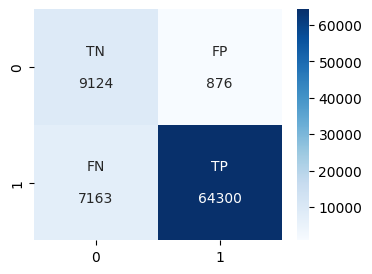

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
group_names = ["TN","FP","FN","TP"]
group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

## Now we try to implement the cluster-autoencoder pair system on this data that has been preprocessed using one hot encoding

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

y = kmeans.fit_predict(x_train)

train_df['Cluster_6'] = y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clustered_df = []
for i in range(6):
  clustered_df += [train_df[train_df["Cluster_6"] == i]]

In [ ]:
train_clustered_df = 6 * [0]
for i in range(len(clustered_df)):
  train_clustered_df[i] = clustered_df[i].drop(["Cluster_6","label"],axis=1)

In [ ]:

for i in range(6):
  print(f"Cluster no = {i+1}; no. of points = {len(train_clustered_df[i])}")

Cluster no = 1; no. of points = 35246
Cluster no = 2; no. of points = 9859
Cluster no = 3; no. of points = 3874
Cluster no = 4; no. of points = 2819
Cluster no = 5; no. of points = 6999
Cluster no = 6; no. of points = 8257


In [ ]:
""

''

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder_v2(input_dim):
  input_layer = Input(shape=(input_dim,))
  encoded_1 = Dense(64, activation="relu")(input_layer)
  encoded_2 = Dense(32, activation="relu")(encoded_1)
  encoded_3= Dense(16, activation="relu")(encoded_2)
  decoded_1 = Dense(32, activation="relu")(encoded_3)
  decoded_2 = Dense(64, activation="relu")(decoded_1)
  decoded_3 = Dense(input_dim, activation="sigmoid")(decoded_2)
  autoencoder = Model(inputs=input_layer,outputs=decoded_3)

  autoencoder.compile(optimizer="adam",loss=tf.keras.losses.mean_squared_error, metrics=["acc"])

  return autoencoder

In [ ]:
autoencoder_cluster_122_0 = create_autoencoder_v2(122)
autoencoder_cluster_122_1 = create_autoencoder_v2(122)
autoencoder_cluster_122_2 = create_autoencoder_v2(122)
autoencoder_cluster_122_3 = create_autoencoder_v2(122)
autoencoder_cluster_122_4 = create_autoencoder_v2(122)
autoencoder_cluster_122_5 = create_autoencoder_v2(122)

In [ ]:
from keras.callbacks import History

history_0 = History()
history_1 = History()
history_2 = History()
history_3 = History()
history_4 = History()
history_5 = History()

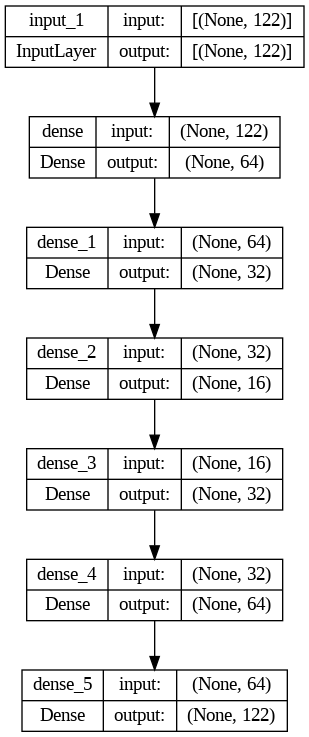

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder_cluster_122_0, to_file='autoencoder_visualization_122.png', show_shapes=True, show_layer_names=True)

## Cluster-Autoencoder 0

In [ ]:
from keras.models import load_model
autoencoder_cluster_122_0 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_0.h5')

In [ ]:
training_array_0 = np.array(train_clustered_df[0]).astype("float32")
# autoencoder_cluster_122_0.fit(training_array_0,training_array_0, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_0 = autoencoder_cluster_122_0.predict(training_array_0)

1102/1102 [==============================] - 2s 1ms/step


In [ ]:
# from keras.models import save_model

# autoencoder_cluster_122_0.save('autoencoder_cluster_122_v2_0.h5')

In [ ]:
mse_cluster_0_train = np.mean(np.power(training_array_0 - ae_op_cluster_0, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_0_train)}")

threshold_0 = np.mean(mse_cluster_0_train) + np.std(mse_cluster_0_train)
print("Threshold: ", threshold_0)

average MSE = 4.989939043298364e-05
Threshold:  0.00053285144


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(mse_cluster_0_train)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)

threshold_ppf_0 = percentile_threshold


Percentile Threshold: 0.000844284817579819


## Cluster-Autoencoder 1

In [ ]:
from keras.models import load_model
autoencoder_cluster_122_1 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_1.h5')

In [ ]:
training_array_1 = np.array(train_clustered_df[1]).astype("float32")
# autoencoder_cluster_122_1.fit(training_array_1,training_array_1, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_1 = autoencoder_cluster_122_1.predict(training_array_1)

309/309 [==============================] - 1s 1ms/step


In [ ]:
# from keras.models import save_model

# autoencoder_cluster_122_1.save('autoencoder_cluster_122_v2_1.h5')

In [ ]:
mse_cluster_1_train = np.mean(np.power(training_array_1 - ae_op_cluster_1, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_1_train)}")

threshold_1 = np.mean(mse_cluster_1_train) + np.std(mse_cluster_1_train)
print("Threshold: ", threshold_1)

average MSE = 8.401434024563059e-05
Threshold:  0.0005203315


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(mse_cluster_1_train)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)

threshold_ppf_1 = percentile_threshold


Percentile Threshold: 0.0008016922290765207


## Cluster-Autoencoder 2

In [ ]:
from keras.models import load_model
autoencoder_cluster_122_2 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_2.h5')

In [ ]:
training_array_2 = np.array(train_clustered_df[2]).astype("float32")
# autoencoder_cluster_122_2.fit(training_array_2,training_array_2, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_2 = autoencoder_cluster_122_2.predict(training_array_2)

122/122 [==============================] - 0s 2ms/step


In [ ]:
# from keras.models import save_model

# autoencoder_cluster_122_2.save('autoencoder_cluster_122_v2_2.h5')

In [ ]:
mse_cluster_2_train = np.mean(np.power(training_array_2 - ae_op_cluster_2, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_2_train)}")

threshold_2 = np.mean(mse_cluster_2_train) + np.std(mse_cluster_2_train)
print("Threshold: ", threshold_2)

average MSE = 0.00176228245254606
Threshold:  0.005037929


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(mse_cluster_2_train)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)

threshold_ppf_2 = percentile_threshold


Percentile Threshold: 0.007150241252438423


## Cluster-Autoencoder 3

In [ ]:
from keras.models import load_model
autoencoder_cluster_122_3 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_3.h5')

In [ ]:
training_array_3 = np.array(train_clustered_df[3]).astype("float32")
# autoencoder_cluster_122_3.fit(training_array_3,training_array_3, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_3 = autoencoder_cluster_122_3.predict(training_array_3)

89/89 [==============================] - 0s 1ms/step


In [ ]:
# from keras.models import save_model

# autoencoder_cluster_122_3.save('autoencoder_cluster_122_v2_3.h5')

In [ ]:
mse_cluster_3_train = np.mean(np.power(training_array_3 - ae_op_cluster_3, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_3_train)}")

threshold_3 = np.mean(mse_cluster_3_train) + np.std(mse_cluster_3_train)
print("Threshold: ", threshold_3)

average MSE = 0.0014092952478677034
Threshold:  0.004820774


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(mse_cluster_3_train)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)

threshold_ppf_3 = percentile_threshold


Percentile Threshold: 0.007020678189450052


## Cluster-Autoencoder 4

In [ ]:
from keras.models import load_model
autoencoder_cluster_122_4 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_4.h5')

In [ ]:
training_array_4 = np.array(train_clustered_df[4]).astype("float32")
# autoencoder_cluster_122_4.fit(training_array_4,training_array_4, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_4 = autoencoder_cluster_122_4.predict(training_array_4)

219/219 [==============================] - 1s 2ms/step


In [ ]:
# from keras.models import save_model

# autoencoder_cluster_122_4.save('autoencoder_cluster_122_v2_4.h5')

In [ ]:
mse_cluster_4_train = np.mean(np.power(training_array_4 - ae_op_cluster_4, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_4_train)}")

threshold_4 = np.mean(mse_cluster_4_train) + np.std(mse_cluster_4_train)
print("Threshold: ", threshold_4)

average MSE = 0.00028657694929279387
Threshold:  0.0016516402


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(mse_cluster_4_train)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)

threshold_ppf_4 = percentile_threshold


Percentile Threshold: 0.002531906181052569


## Cluster-Autoencoder 5

In [ ]:
from keras.models import load_model
autoencoder_cluster_122_5 = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder-cluster-pair-122-v2/autoencoder_cluster_122_v2_5.h5')

In [ ]:
training_array_5 = np.array(train_clustered_df[5]).astype("float32")
# autoencoder_cluster_122_5.fit(training_array_5,training_array_5, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[history_0])
ae_op_cluster_5 = autoencoder_cluster_122_5.predict(training_array_5)

259/259 [==============================] - 1s 2ms/step


In [ ]:
# from keras.models import save_model

# autoencoder_cluster_122_5.save('autoencoder_cluster_122_v2_5.h5')

In [ ]:
mse_cluster_5_train = np.mean(np.power(training_array_5 - ae_op_cluster_5, 2), axis=1)
print(f"average MSE = {np.average(mse_cluster_5_train)}")

threshold_5 = np.mean(mse_cluster_5_train) + np.std(mse_cluster_5_train)
print("Threshold: ", threshold_5)

average MSE = 0.0035596033558249474
Threshold:  0.009444989


In [ ]:
import numpy as np
from scipy.stats import norm


mu, sigma = norm.fit(mse_cluster_5_train)


percentile_threshold = norm.ppf(0.95, loc=mu, scale=sigma)



print("Percentile Threshold:", percentile_threshold)

threshold_ppf_5 = percentile_threshold


Percentile Threshold: 0.01324020171291449


In [ ]:
threshold_ppf_arr = [threshold_ppf_0,threshold_ppf_1,threshold_ppf_2,threshold_ppf_3,threshold_ppf_4,threshold_ppf_5]
threshold_arr = [threshold_0,threshold_1,threshold_2,threshold_3,threshold_4,threshold_5]
autoencoder_arr = [autoencoder_cluster_122_0,autoencoder_cluster_122_1,autoencoder_cluster_122_2,autoencoder_cluster_122_3,autoencoder_cluster_122_4,autoencoder_cluster_122_5]

In [ ]:
def cluster_assignment_bulk(test_data):
  test_data_arr = np.array(test_data)
  return kmeans.predict(test_data_arr)

In [ ]:
def cluster_autoencoder_pair_bulk(X):
    count_anomalous_ = 0
    count_normal_ = 0
    y_pred_ = list()
    cluster_no_arr = cluster_assignment_bulk(X)
    cluster_data_arrays = {}
    for cluster_value in np.unique(cluster_no_arr):
        cluster_data_arrays[cluster_value] = X[cluster_no_arr == cluster_value]
    autoencoder_output_arr = {}
    for i in np.unique(cluster_no_arr):
        autoencoder_output_arr[i] = autoencoder_arr[i].predict(cluster_data_arrays[i])
        losses = np.mean(np.power(cluster_data_arrays[i] - autoencoder_output_arr[i], 2), axis=1)
        for loss in losses:
          if loss > threshold_ppf_arr[i]:
              count_anomalous_ += 1
              y_pred_.append(1)
          else:
              count_normal_ += 1
              y_pred_.append(0)
    return count_anomalous_, count_normal_, y_pred_

In [ ]:
unique_values, value_counts = np.unique(cluster_assignment_bulk(anomalous_test), return_counts=True)

for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 2245
Value: 1, Count: 563
Value: 2, Count: 10916
Value: 3, Count: 16965
Value: 4, Count: 555
Value: 5, Count: 40219


In [ ]:
unique_values, value_counts = np.unique(cluster_assignment_bulk(x_train), return_counts=True)

for value, count in zip(unique_values, value_counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 35246
Value: 1, Count: 9859
Value: 2, Count: 3874
Value: 3, Count: 2819
Value: 4, Count: 6999
Value: 5, Count: 8257


In [ ]:
threshold_ppf_arr = np.array(threshold_arr) * 0.057015789473684214
for i in threshold_ppf_arr:
  print(i)

3.0380945523789473e-05
2.9667111260526317e-05
0.0002872414992473684
0.00027486023548421056
9.416956992947369e-05
0.0005385135044052632


In [ ]:
threshold_ppf_arr[0] += 0.00001
threshold_ppf_arr[1] += 0.00001
threshold_ppf_arr[2] -= 0.0001
threshold_ppf_arr[3] -= 0.0001
threshold_ppf_arr[4] += 0.00001
threshold_ppf_arr[5] -= 0.0001

In [ ]:
threshold_ppf_arr

array([4.03809455e-05, 3.96671113e-05, 1.87241499e-04, 1.74860235e-04,
       1.04169570e-04, 4.38513504e-04])

In [ ]:
actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)

17/17 [==============================] - 0s 2ms/step


In [ ]:
actual_normal_count_anomalous, actual_normal_count_normal

(2110, 7890)

In [ ]:
actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

1257/1257 [==============================] - 2s 1ms/step


In [ ]:
actual_anomalous_count_anomalous, actual_anomalous_count_normal,

(69925, 1538)

In [ ]:
count_anomalous, count_normal, y_pred = cluster_autoencoder_pair_bulk(x_test)

1274/1274 [==============================] - 2s 1ms/step


In [ ]:
count_anomalous, count_normal

(72035, 9428)

In [ ]:
y = kmeans.predict(x_test)

test_df['Cluster_6'] = y

test_df.head(3)

duration src_bytes dst_bytes land wrong_fragment urgent  hot  \
0      0.0       0.0       0.0    0              0    0.0  0.0   
1      0.0  0.000001       0.0    0              0    0.0  0.0   
2      0.0       0.0   0.00001    0              0    0.0  0.0   

  num_failed_logins logged_in num_compromised root_shell su_attempted  \
0               0.0         0             0.0          0          0.0   
1               0.0         1             0.0          0          0.0   
2               0.0         1             0.0          0          0.0   

  num_root num_file_creations num_shells num_access_files num_outbound_cmds  \
0      0.0                0.0        0.0              0.0                 0   
1      0.0                0.0        0.0              0.0                 0   
2      0.0                0.0        0.0              0.0                 0   

  is_host_login is_guest_login     count srv_count serror_rate  \
0             0              0  0.209393  0.209393         0.0   
1             0              0  0.003914  0.003914         0.0   
2             0              0   0.04501  0.046967         0.0   

  srv_serror_rate rerror_rate srv_rerror_rate same_srv_rate diff_srv_rate  \
0             0.0         0.0             0.0           1.0           0.0   
1             0.0         0.0             0.0           1.0           0.0   
2             0.0         0.0             0.0           1.0           0.0   

  srv_diff_host_rate dst_host_count dst_host_srv_count dst_host_same_srv_rate  \
0                0.0            1.0           0.784314                   0.78   
1                0.0            1.0           0.580392                   0.58   
2               0.08            1.0                1.0                    1.0   

  dst_host_diff_srv_rate dst_host_same_src_port_rate  \
0                   0.01                         0.0   
1                   0.03                        0.59   
2                    0.0                         0.0   

  dst_host_srv_diff_host_rate dst_host_serror_rate dst_host_srv_serror_rate  \
0                         0.0                  0.0                      0.0   
1                         0.0                  0.0                     0.01   
2                         0.0                  0.0                      0.0   

  dst_host_rerror_rate dst_host_srv_rerror_rate   label protocol_type_icmp  \
0                  0.0                      0.0  normal              False   
1                  0.0                      0.0  normal              False   
2                  0.0                      0.0  normal              False   

  protocol_type_tcp protocol_type_udp service_IRC service_X11 service_Z39_50  \
0             False              True       False       False          False   
1              True             False       False       False          False   
2              True             False       False       False          False   

  service_aol service_auth service_bgp service_courier service_csnet_ns  \
0       False        False       False           False            False   
1       False        False       False           False            False   
2       False        False       False           False            False   

  service_ctf service_daytime service_discard service_domain service_domain_u  \
0       False           False           False          False             True   
1       False           False           False          False            False   
2       False           False           False          False            False   

  service_echo service_eco_i service_ecr_i service_efs service_exec  \
0        False         False         False       False        False   
1        False         False         False       False        False   
2        False         False         False       False        False   

  service_finger service_ftp service_ftp_data service_gopher service_harvest  \
0          False       False            False          False 

In [ ]:
y_true_ = []

for cluster_value in range(6):
    cluster_df = test_df[test_df['Cluster_6'] == cluster_value]
    y = np.where(cluster_df['label'] == 'normal', 0, 1)
    y_true_.extend(y)

# Result: Using CAEP (One-hot-encoded)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true_, y_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true_, y_pred))

Confusion Matrix:
[[ 7890  2110]
 [ 1538 69925]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     10000
           1       0.97      0.98      0.97     71463

    accuracy                           0.96     81463
   macro avg       0.90      0.88      0.89     81463
weighted avg       0.95      0.96      0.95     81463



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))
group_names = ["TN","FP","FN","TP"]
group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
threshold_arr

[0.00053285144,
 0.0005203315,
 0.005037929,
 0.004820774,
 0.0016516402,
 0.009444989]

In [ ]:
threshold_arr = [0.00053285144,0.0005203315,0.005037929,0.004820774,0.0016516402,0.009444989]
threshold_comb_arr = []
adjustment_range_arr = [0.0001,0.0001,0.001,0.001,0.001,0.001]
for i in range(len(threshold_arr)):
  arr = []
  for adjustment in np.linspace(-adjustment_range_arr[i], adjustment_range_arr[i], num=5):
    arr += [adjustment + threshold_arr[i]]
  threshold_comb_arr += [arr]
print(threshold_comb_arr)

[[0.00043285143999999997, 0.00048285143999999994, 0.00053285144, 0.00058285144, 0.00063285144], [0.00042033150000000003, 0.0004703315, 0.0005203315, 0.0005703315, 0.0006203315000000001], [0.004037929, 0.004537929, 0.005037929, 0.0055379290000000005, 0.006037929], [0.003820774, 0.0043207739999999994, 0.004820774, 0.005320774, 0.005820774], [0.0006516402000000001, 0.0011516402, 0.0016516402, 0.0021516402, 0.0026516402000000003], [0.008444989, 0.008944989, 0.009444989, 0.009944989000000001, 0.010444989000000002]]


In [ ]:
# best_accuracy = 0
# best_threshold = []

# for i in threshold_comb_arr[0]:
#   for j in threshold_comb_arr[1]:
#     for k in threshold_comb_arr[2]:
#       for l in threshold_comb_arr[3]:
#         for m in threshold_comb_arr[4]:
#           for n in threshold_comb_arr[5]:
#             threshold_ppf_arr = [i,j,k,l,m,n]

#             actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
#             actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

#             tp = actual_anomalous_count_anomalous
#             tn = actual_normal_count_normal
#             fp = actual_normal_count_anomalous
#             fn = actual_anomalous_count_normal

#             accuracy = (tp + tn) / (tp + tn + fp + fn)
#             print(f"{i} {j} {k} {l} {m} {n}")
#             print(f"accuracy = {accuracy}")
#             print(f"best acc = {best_accuracy}")

#             if accuracy > best_accuracy:
#               best_accuracy = accuracy
#               best_threshold = threshold_ppf_arr
#               print(f"######*****#######BEST ACCURACY = {best_accuracy}")

# print(best_accuracy)
# print(best_threshold)

1257/1257 [==============================] - 2s 1ms/step
0.00043285143999999997 0.00042033150000000003 0.004037929 0.003820774 0.0006516402000000001 0.008444989
accuracy = 0.9362778193781226
best acc = 0
######*****#######BEST ACCURACY = 0.9362778193781226
1257/1257 [==============================] - 2s 1ms/step
0.00043285143999999997 0.00042033150000000003 0.004037929 0.003820774 0.0006516402000000001 0.008944989
accuracy = 0.9362778193781226
best acc = 0.9362778193781226
1257/1257 [==============================] - 2s 1ms/step
0.00043285143999999997 0.00042033150000000003 0.004037929 0.003820774 0.0006516402000000001 0.009444989
accuracy = 0.9362778193781226
best acc = 0.9362778193781226
1257/1257 [==============================] - 2s 1ms/step
0.00043285143999999997 0.00042033150000000003 0.004037929 0.003820774 0.0006516402000000001 0.009944989000000001
accuracy = 0.9362778193781226
best acc = 0.9362778193781226
1257/1257 [==============================] - 2s 1ms/step
0.000432851439

KeyboardInterrupt: 

In [ ]:
# import numpy as np
# from scipy.stats import norm

# best_accuracy = 0
# best_threshold_arr = []

# for i in range(94,96):
#   for j in range(94,96):
#     for k in range(94,96):
#       for l in range(94,96):
#         for m in range(94,96):
#           for n in range(94,96):

#             mu_0, sigma_0 = norm.fit(mse_cluster_0_train)
#             threshold_ppf_0 = norm.ppf(i/100, loc=mu_0, scale=sigma_0)
#             mu_1, sigma_1 = norm.fit(mse_cluster_1_train)
#             threshold_ppf_1 = norm.ppf(j/100, loc=mu_1, scale=sigma_1)
#             mu_2, sigma_2 = norm.fit(mse_cluster_2_train)
#             threshold_ppf_2 = norm.ppf(k/100, loc=mu_2, scale=sigma_2)
#             mu_3, sigma_3 = norm.fit(mse_cluster_3_train)
#             threshold_ppf_3 = norm.ppf(l/100, loc=mu_3, scale=sigma_3)
#             mu_4, sigma_4 = norm.fit(mse_cluster_4_train)
#             threshold_ppf_4 = norm.ppf(m/100, loc=mu_4, scale=sigma_4)
#             mu_5, sigma_5 = norm.fit(mse_cluster_5_train)
#             threshold_ppf_5 = norm.ppf(n/100, loc=mu_5, scale=sigma_5)

#             threshold_ppf_arr = [threshold_ppf_0,threshold_ppf_1,threshold_ppf_2,threshold_ppf_3,threshold_ppf_4,threshold_ppf_5]

#             actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
#             actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

#             tp = actual_anomalous_count_anomalous
#             tn = actual_normal_count_normal
#             fp = actual_normal_count_anomalous
#             fn = actual_anomalous_count_normal

#             accuracy = (tp + tn) / (tp + tn + fp + fn)
#             print(f"{i} {j} {k} {l} {m} {n}")
#             print(f"acc = {accuracy}")
#             print(f"best acc = {best_accuracy}")
#             print(f"best thresh = {best_threshold_arr}")

#             if(accuracy > best_accuracy):
#               best_accuracy = accuracy
#               best_threshold_arr = threshold_ppf_arr

# print(best_accuracy)
# print(best_threshold_arr)

In [ ]:
best_accuracy = 0
best_multiplier = 0
for i in np.linspace(-0.5, 0.5, num=10):
  threshold_ppf_arr = []
  threshold_0 = np.mean(mse_cluster_0_train) + (i * np.std(mse_cluster_0_train))
  threshold_1 = np.mean(mse_cluster_1_train) + (i * np.std(mse_cluster_1_train))
  threshold_2 = np.mean(mse_cluster_2_train) + (i * np.std(mse_cluster_2_train))
  threshold_3 = np.mean(mse_cluster_3_train) + (i * np.std(mse_cluster_3_train))
  threshold_4 = np.mean(mse_cluster_4_train) + (i * np.std(mse_cluster_4_train))
  threshold_5 = np.mean(mse_cluster_5_train) + (i * np.std(mse_cluster_5_train))
  threshold_ppf_arr = [threshold_0, threshold_1, threshold_2, threshold_3, threshold_4, threshold_5 ]

  actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
  actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

  tp = actual_anomalous_count_anomalous
  tn = actual_normal_count_normal
  fp = actual_normal_count_anomalous
  fn = actual_anomalous_count_normal

  accuracy = (tp + tn) / (tp + tn + fp + fn)
  print(f"multiplier = {i} \n{threshold_ppf_arr}")
  print(f"acc = {accuracy}")
  if(accuracy > best_accuracy):
    best_accuracy = accuracy
    best_multiplier = i

print(best_accuracy)
print(best_multiplier)

1257/1257 [==============================] - 2s 1ms/step
multiplier = -0.5 
[-0.0001915766333695501, -0.0001341442475677468, 0.00012445927131921053, -0.00029644405003637075, -0.0003959546738769859, 0.0006169104017317295]
acc = 0.8698673017197992
1257/1257 [==============================] - 2s 1ms/step
multiplier = -0.3888888888888889 
[-0.00013791529474676485, -8.566456138699627e-05, 0.0004884199782585104, 8.260912727564573e-05, -0.0002442809798392571, 0.0012708421693080002]
acc = 0.8679768729361796
1257/1257 [==============================] - 2s 1ms/step
multiplier = -0.2777777777777778 
[-8.425395612397956e-05, -3.7184875206245735e-05, 0.0008523806851978103, 0.0004616623045876622, -9.260728580152825e-05, 0.0019247739368842707]
acc = 0.8636681683709169
1257/1257 [==============================] - 2s 1ms/step
multiplier = -0.16666666666666669 
[-3.059261750119428e-05, 1.1294810974504785e-05, 0.0012163413921371102, 0.0008407154818996786, 5.9066408236200575e-05, 0.0025787057044605413]
ac

In [ ]:
# threshold_ppf_arr = threshold_arr
best_acc = 0
best_mul = 0
for i in np.linspace(0.0565,0.0572,num=20):
  threshold_ppf_arr = np.array(threshold_arr) * i
  actual_normal_count_anomalous, actual_normal_count_normal, actual_normal_y_pred = cluster_autoencoder_pair_bulk(normal_test)
  actual_anomalous_count_anomalous, actual_anomalous_count_normal, actual_anomalous_y_pred = cluster_autoencoder_pair_bulk(anomalous_test)

  tp = actual_anomalous_count_anomalous
  tn = actual_normal_count_normal
  fp = actual_normal_count_anomalous
  fn = actual_anomalous_count_normal

  accuracy = (tp + tn) / (tp + tn + fp + fn)

  print(accuracy)
  print(f"i={i}\nacc= {accuracy}")

  if(accuracy > best_acc):
    best_acc = accuracy
    best_mul = i
print(f"best acc = {best_acc}")
print(best_mul)

1257/1257 [==============================] - 2s 1ms/step
0.9544946785657292
i=0.0565
acc= 0.9544946785657292
1257/1257 [==============================] - 2s 1ms/step
0.9545069540773111
i=0.056536842105263156
acc= 0.9545069540773111
1257/1257 [==============================] - 2s 1ms/step
0.9545069540773111
i=0.05657368421052632
acc= 0.9545069540773111
1257/1257 [==============================] - 2s 1ms/step
0.9544946785657292
i=0.05661052631578947
acc= 0.9544946785657292
1257/1257 [==============================] - 2s 1ms/step
0.9544946785657292
i=0.056647368421052634
acc= 0.9544946785657292
1257/1257 [==============================] - 2s 1ms/step
0.9545069540773111
i=0.05668421052631579
acc= 0.9545069540773111
1257/1257 [==============================] - 2s 1ms/step
0.9545069540773111
i=0.05672105263157895
acc= 0.9545069540773111
1257/1257 [==============================] - 2s 1ms/step
0.9544946785657292
i=0.056757894736842104
acc= 0.9544946785657292
1257/1257 [=======================

In [ ]:
np.array(threshold_arr) * 0.057015789473684214

array([3.03809455e-05, 2.96671113e-05, 2.87241499e-04, 2.74860235e-04,
       9.41695699e-05, 5.38513504e-04])

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
group_names = ["TN","FP","FN","TP"]
group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
len(x_test[0])

In [ ]:
!pip install wandb

In [ ]:
# import wandb

# def train_autoencoder_122_wandb(config):
#   epochs = config['epochs']
#   batch_size = config['batch_size']
#   learning_rate = config['learning_rate']
#   autoencoder_wandb = create_autoencoder_v2(122)
#   autoencoder_wandb.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate, validation_split=0.2)
#   ae_op_wandb = autoencoder_wandb.predict(x_train)
#   mse_wandb = np.mean(np.power(x_train - ae_op_wandb , 2), axis=1)
#   wandb.log({"loss": np.average(mse_wandb)})



# wandb.init(project='cluster-autoencoder-pair-122')
# sweep_config = {
#     'method': 'random',
#     'parameters': {
#         'epochs': {'values': [50, 75, 100, 125]},
#         'batch_size': {'values': [32, 64, 128]},
#       'learning_rate': {'min': 0.0001, 'max': 0.01},
#     }
# }

# sweep_id = wandb.sweep(sweep_config,project='cluster-autoencoder-pair-122')

# print(sweep_id)

# agent = wandb.agent(sweep_id, function=train_autoencoder_122_wandb)
# agent.periodic_call(60)

In [ ]:
# import wandb
# import time  # Import time for timeout implementation

# def train_autoencoder_122_wandb(config, timeout=None):
#     epochs = config['epochs']
#     batch_size = config['batch_size']
#     learning_rate = config['learning_rate']
#     autoencoder_wandb = create_autoencoder_v2(122)

#     start_time = time.time()  # Track start time for timeout

#     try:
#         autoencoder_wandb.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate, validation_split=0.2)
#         ae_op_wandb = autoencoder_wandb.predict(x_train)
#         mse_wandb = np.mean(np.power(x_train - ae_op_wandb, 2), axis=1)
#         wandb.log({"loss": np.average(mse_wandb)})
#     except Exception as e:  # Catch any errors during training
#         wandb.log({"error": str(e)})  # Log the error
#         # Consider additional actions like gracefully exiting training

#     if timeout and (time.time() - start_time) > timeout:
#         wandb.log({"error": "Training timed out"})  # Log timeout error
#         # Consider additional actions like gracefully exiting training

# wandb.init(project='cluster-autoencoder-pair-122')

# sweep_config = {
#     'method': 'random',
#     'parameters': {
#         'epochs': {'values': [50, 75]},
#         'batch_size': {'values': [128]},
#       'learning_rate': {'min': 0.0001, 'max': 0.001},
#     }
# }

# sweep_id = wandb.sweep(sweep_config, project='cluster-autoencoder-pair-122')

# print(sweep_id)

# agent = wandb.agent(sweep_id, function=train_autoencoder_122_wandb)

# # Optional (for long-running training):
# # agent.periodic_call(60)  # Keep connection alive (consider within training function)

# # Let the agent handle sweep execution


In [ ]:
# import wandb

# wandb.init(project='cluster-autoencoder-pair-122')

In [ ]:
# def train_autoencoder_122_wandb(hyperparameters):
#     # Extract hyperparameters
#     epochs = hyperparameters['epochs']
#     batch_size = hyperparameters['batch_size']
#     learning_rate = hyperparameters['learning_rate']

#     # Create and compile your autoencoder model
#     autoencoder_wandb = create_autoencoder_v2(122)

#     # Train your autoencoder model
#     history = autoencoder_wandb.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, learning_rate=learning_rate, validation_split=0.2)

#     # Log metrics to wandb
#     wandb.log({'val_loss': history.history['loss'][-1], 'val_accuracy': history.history['acc'][-1]})


In [ ]:
# sweep_config = {
#     'method': 'random',  # Specify the search strategy (random, grid, bayes)
#     'parameters': {
#         'epochs': {'values': [30, 50, 75, 100, 125]},
#         'batch_size': {'values': [32, 64, 128]},
#       'learning_rate': {'min': 0.0001, 'max': 0.01},
#     }
# }


In [ ]:
# sweep_id = wandb.sweep(sweep_config, project='cluster-autoencoder-pair-122')


In [ ]:
# wandb.agent(sweep_id, function=train_autoencoder_122_wandb)
